I've analysed the dataset and found out the most popular categories and how the ratings correlates with the demand of the product

In [1]:
#importing all the required packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings as wn
wn.filterwarnings('ignore')

In [2]:
#exploring the data 

df = pd.read_csv('AmazonProducts.csv')
df

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...,...
551580,1099,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
551581,1100,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
551582,1101,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
551583,1102,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN


In [3]:
#columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [4]:
df.describe()

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


In [5]:
#it is important to clean the data before analysing the data for acurate results 
#firstly the coloumns unnamed, image and link are not required for analysis so it should be removed
#then the missing values should be removed

df_new = df.drop(['Unnamed: 0','image','link'], axis=1)
df_new.columns = ['Name', 'Main_Category', 'Sub_Category', 'Ratings', 'No_of_Ratings', 'Discount_Price', 'Actual_Price']
df_new


,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,"₹1,199","₹1,999"
551583,Puma Men Shorts,sports & fitness,Yoga,4.4,37,NaN,NaN


In [6]:
#checking for missing values
df_new.isnull().sum()


Name                   0
Main_Category          0
Sub_Category           0
Ratings           175794
No_of_Ratings     175794
Discount_Price     61163
Actual_Price       17813
dtype: int64

In [7]:
#removing the missing values
df_dropped = df_new.dropna(axis = 0)
df_dropped

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6,₹711,₹999
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,"₹1,199","₹1,999"


In [8]:
df_dropped.isnull().sum()

#there are no null or missing values now

Name              0
Main_Category     0
Sub_Category      0
Ratings           0
No_of_Ratings     0
Discount_Price    0
Actual_Price      0
dtype: int64

In [9]:
#changing of datatype is not yet implemented because some of the Ratings column has non numeric values

df_dropped.Ratings.unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '4.8', '4.7', '3.2', '2.5', '1.0', '2.6', '2.8', '1.7',
       'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.3', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹65', '1.1', '₹70',
       '₹100', '₹99', '₹2.99'], dtype=object)

In [10]:
df_dropped.loc[(df_dropped.Ratings == '₹70')|
               (df_dropped.Ratings == '₹65')|
               (df_dropped.Ratings == '₹100')|
               (df_dropped.Ratings == '₹99')|
               (df_dropped.Ratings == '₹2.99')|
               (df_dropped.Ratings == 'FREE')|
               (df_dropped.Ratings == 'Get')]

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price
437,Daikin 1.8 Ton 3 Star Inverter Split Ac (Coppe...,appliances,Air Conditioners,Get,Only 2 left in stock.,"₹59,979","₹72,900"
473,Master Electronic provides Window AC 3-Star 1....,appliances,Air Conditioners,Get,Only 1 left in stock.,"₹36,999","₹39,999"
474,Master Electronic provides 1.5 Ton 3 Star Dust...,appliances,Air Conditioners,Get,Only 1 left in stock.,"₹36,999","₹39,666"
475,Master Electronics Provides 1 Ton 3 Star Inver...,appliances,Air Conditioners,Get,Only 1 left in stock.,"₹46,999","₹49,666"
488,"1.5 Ton 5 Star Inverter Split AC, White",appliances,Air Conditioners,Get,Only 2 left in stock.,"₹45,000","₹50,000"
...,...,...,...,...,...,...,...
551502,Puma Men Sweatshirt,sports & fitness,Yoga,Get,FREE Delivery by Amazon,"₹3,712.10","₹4,999"
551504,Monte Carlo Hood Full Sleeve Sweatshirt Womens...,sports & fitness,Yoga,Get,FREE Delivery by Amazon,"₹1,917","₹1,945"
551541,Adidas Men's Flat,sports & fitness,Yoga,Get,FREE Delivery by Amazon,"₹1,429.60","₹3,599"
551550,Amazon Brand - Symactive Men's Activewear Gym ...,sports & fitness,Yoga,Get,FREE Delivery by Amazon,₹699,"₹2,199"


In [11]:
#removing the values with inr symbol 

df_dropped_1 = df_dropped.drop(df_dropped[df_dropped['Ratings'].str.contains('₹')].index)
df_dropped_1

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6,₹711,₹999
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,"₹1,199","₹1,999"


In [12]:
df_dropped_2 = df_dropped_1[(df_dropped_1.Ratings != 'Get')&
                            (df_dropped_1.Ratings != 'FREE')]
df_dropped_2

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6,₹711,₹999
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,"₹1,199","₹1,999"


In [13]:
df_dropped_2.loc[(df_dropped_2.Ratings == 'Get')|(df_dropped_2.Ratings == 'FREE')]

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price


In [14]:
#now changing the Ratings dtattype to float

df_dropped_2['Ratings'] = df_dropped_2['Ratings'].astype('float64')
df_dropped_2.dtypes

Name               object
Main_Category      object
Sub_Category       object
Ratings           float64
No_of_Ratings      object
Discount_Price     object
Actual_Price       object
dtype: object

In [15]:
#Next we have to change the datatype of No_of_Ratings

df_dropped_2.No_of_Ratings = df_dropped_2.No_of_Ratings.str.replace(',','')
df_dropped_2

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255,"₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948,"₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206,"₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6,₹711,₹999
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,"₹1,199","₹1,999"


In [16]:
# remove all string values from a column using regex

df_dropped_2['No_of_Ratings'] = df_dropped_2['No_of_Ratings'].replace('[a-zA-Z]', np.nan, regex=True)

df_dropped_2

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255,"₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948,"₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206,"₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6,₹711,₹999
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,"₹3,449","₹4,599"
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,"₹1,199","₹1,999"
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,"₹1,199","₹1,999"


In [17]:
#Typecasting

df_dropped_2['No_of_Ratings'] = df_dropped_2['No_of_Ratings'].astype('float64')
df_dropped_2['No_of_Ratings'] = df_dropped_2['No_of_Ratings'].astype('int64')
df_dropped_2.dtypes

Name               object
Main_Category      object
Sub_Category       object
Ratings           float64
No_of_Ratings       int64
Discount_Price     object
Actual_Price       object
dtype: object

In [18]:
#now the Discount column should be changed to float

df_dropped_2.Discount_Price.unique()

array(['₹32,999', '₹46,490', '₹34,490', ..., '₹618.47', '₹11,746.93',
       '₹115.52'], dtype=object)

In [19]:
#the ,and inr should be replaced with empty string

df_dropped_2.Discount_Price = df_dropped_2.Discount_Price.str.replace(',','')
df_dropped_2.Discount_Price = df_dropped_2.Discount_Price.str.replace('₹','')


In [20]:
df_dropped_2['Discount_Price'] = df_dropped_2['Discount_Price'].astype('float64')
df_dropped_2.dtypes

Name               object
Main_Category      object
Sub_Category       object
Ratings           float64
No_of_Ratings       int64
Discount_Price    float64
Actual_Price       object
dtype: object

In [21]:
#same should be done for actual price column

df_dropped_2.Actual_Price = df_dropped_2.Actual_Price.str.replace(',','')
df_dropped_2.Actual_Price = df_dropped_2.Actual_Price.str.replace('₹','')


In [22]:
df_dropped_2.Actual_Price = df_dropped_2.Actual_Price.astype('float64')
df_dropped_2.dtypes

Name               object
Main_Category      object
Sub_Category       object
Ratings           float64
No_of_Ratings       int64
Discount_Price    float64
Actual_Price      float64
dtype: object

In [23]:
#checking for duplicates

df_dropped_2.duplicated().any()
df_cleaned = df_dropped_2.drop_duplicates()

In [24]:
#Flase means no more duplicates

df_cleaned.duplicated().any()

False

In [25]:
df_cleaned

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,34490.0,67790.0
...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6,711.0,999.0
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,3449.0,4599.0
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,1199.0,1999.0
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,1199.0,1999.0


In [26]:
#now have to analyse the data. To do that we need to add 2 extra columns; total sales and discount percentage

df_cleaned['Total_Sales'] = df_cleaned.No_of_Ratings * df_cleaned.Discount_Price
df_cleaned['Percentage_Discount'] = (df_cleaned['Actual_Price'] - df_cleaned['Discount_Price']) / df_cleaned['Actual_Price']*100

df_cleaned

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price,Total_Sales,Percentage_Discount
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255,32999.0,58990.0,74412745.0,44.060010
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948,46490.0,75990.0,137052520.0,38.820897
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206,34490.0,61990.0,41594940.0,44.361994
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,37990.0,68990.0,2621310.0,44.934048
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,34490.0,67790.0,21728700.0,49.122289
...,...,...,...,...,...,...,...,...,...
551579,BE SAVAGE Pink I Purple You Hoodie Suitable fo...,sports & fitness,Yoga,4.6,6,711.0,999.0,4266.0,28.828829
551580,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,3.2,9,3449.0,4599.0,31041.0,25.005436
551581,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,2.0,2,1199.0,1999.0,2398.0,40.020010
551582,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,4.0,1,1199.0,1999.0,1199.0,40.020010


In [27]:
#check how many main and sub categories are present

len(df_cleaned.Main_Category.unique())

20

In [28]:
#calculation of sales per category

sales_per_category = df_cleaned.groupby('Main_Category', as_index=False)[['No_of_Ratings']].sum()\
                    .sort_values('No_of_Ratings',ascending=False).head(10)
sales_per_category

,Main_Category,No_of_Ratings
17,"tv, audio & cameras",165222327
15,stores,16992343
1,appliances,16267430
18,women's clothing,12958073
16,toys & baby products,12218322
0,accessories,10211331
3,beauty & health,9198529
6,home & kitchen,8763548
11,men's shoes,4768230
10,men's clothing,3676896


In [29]:
#top 5 categories with highest sales are 

sales_per_category.head(5)

,Main_Category,No_of_Ratings
17,"tv, audio & cameras",165222327
15,stores,16992343
1,appliances,16267430
18,women's clothing,12958073
16,toys & baby products,12218322


In [30]:
#calculation of sales per sub category

sales_per_subcategory = df_cleaned.groupby('Sub_Category', as_index = False)[['No_of_Ratings']].sum() \
    .sort_values(by = 'No_of_Ratings', ascending = False).head(10)
sales_per_subcategory

,Sub_Category,No_of_Ratings
3,All Electronics,74030978
46,Headphones,29171496
20,Cameras,19769600
19,Camera Accessories,19099879
51,Home Entertainment Systems,15461168
74,Men's Fashion,8980906
1,All Appliances,7314447
68,Kitchen & Home Appliances,6412926
9,Amazon Fashion,6041727
15,Bags & Luggage,5822709


In [31]:
popular_by_rating = df_cleaned.loc[(df_cleaned.Ratings >= 4)].sort_values(by = ['No_of_Ratings'], ascending = False).head(250)
popular_by_rating

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price,Total_Sales,Percentage_Discount
71417,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"tv, audio & cameras",Cameras,4.3,589547,523.0,700.0,3.083331e+08,25.285714
79485,SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-4...,"tv, audio & cameras",Cameras,4.3,589547,15600.0,22289.0,9.196933e+09,30.010319
70773,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"tv, audio & cameras",Cameras,4.3,589547,495.0,500.0,2.918258e+08,1.000000
61338,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"tv, audio & cameras",Camera Accessories,4.3,589547,523.0,700.0,3.083331e+08,25.285714
70497,SanDisk 128GB Class 10 microSDXC Memory Card w...,"tv, audio & cameras",Cameras,4.3,589547,1705.0,3999.0,1.005178e+09,57.364341
...,...,...,...,...,...,...,...,...,...
11884,TP-link N300 WiFi Wireless Router TL-WR845N | ...,"tv, audio & cameras",All Electronics,4.2,124050,1099.0,1699.0,1.363310e+08,35.314891
13984,"JBL Go 3, Wireless Ultra Portable Bluetooth Sp...","tv, audio & cameras",All Electronics,4.4,122476,3215.0,4499.0,3.937603e+08,28.539675
20879,"JBL Go 3, Wireless Ultra Portable Bluetooth Sp...","tv, audio & cameras",All Electronics,4.4,122476,3215.0,3999.0,3.937603e+08,19.604901
14053,"JBL Go 3, Wireless Ultra Portable Bluetooth Sp...","tv, audio & cameras",All Electronics,4.4,122476,3214.0,3999.0,3.936379e+08,19.629907


In [32]:
#these are the top products by number of ratings
list(popular_by_rating['Name'])

['SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Memory Card',
 'SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-400G-GN6MA) with Adapter',
 'SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQUAR-016G-GN6MN)',
 'SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Memory Card',
 'SanDisk 128GB Class 10 microSDXC Memory Card with Adapter (SDSQUAR-128G-GN6MA)',
 'SanDisk 512GB Ultra MicroSDXC UHS-I Memory Card - 100MB/s, C10, U1, Full HD, A1, Micro SD Card - SDSQUAR-512G-GN6MN',
 'SanDisk Ultra 64GB UHS-I Class 10 Micro SD Memory Card (SDSQUNC-064G-GN3MN)',
 'SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-400G-GN6MA) with Adapter',
 'SanDisk 256GB Class 10 MicroSD Card with Adapter (SDSQUAR-256G-GN6MA)',
 'SanDisk Ultra 64GB UHS-I Class 10 Micro SD Memory Card (SDSQUNC-064G-GN3MN)',
 'SanDisk 256GB Class 10 MicroSD Card with Adapter (SDSQUAR-256G-GN6MA)',
 'SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQUAR-016G-GN6MN)',
 'SanDisk 128GB Class 10 microSDXC Memory Card with Adapter (SDSQUAR-128G-GN6MA)',
 'Amazon

In [33]:
#top selling products shou;d have been greater in ratings, number of ratings and total sales 

top_selling_products = df_cleaned.sort_values(['No_of_Ratings', 'Ratings', 'Total_Sales'], ascending = False).head(200).Name.unique()
top_selling_products

array(['SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-400G-GN6MA) with Adapter',
       'SanDisk 512GB Ultra MicroSDXC UHS-I Memory Card - 100MB/s, C10, U1, Full HD, A1, Micro SD Card - SDSQUAR-512G-GN6MN',
       'SanDisk 256GB Class 10 MicroSD Card with Adapter (SDSQUAR-256G-GN6MA)',
       'SanDisk 128GB Class 10 microSDXC Memory Card with Adapter (SDSQUAR-128G-GN6MA)',
       'SanDisk Ultra 64GB UHS-I Class 10 Micro SD Memory Card (SDSQUNC-064G-GN3MN)',
       'SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Memory Card',
       'SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQUAR-016G-GN6MN)',
       'Amazon Basics High-Speed HDMI Cable - 10 Feet (2-Pack) -Latest Standard for Xbox, PlayStation, Television, Personal Comput...',
       'Amazon Basics High-Speed HDMI Cable, 3 Feet (Black, 2-Pack) - Supports Ethernet, 3D, 4K video',
       'Amazon Basics High-Speed HDMI Cable - 10 Feet (Latest Standard) - Supports Ethernet, 3D, 4K video,Black',
       'Amazon Basics High-Speed HDMI Cable, 6 F

In [34]:
least_selling_products = df_cleaned.sort_values(['No_of_Ratings', 'Ratings', 'Total_Sales'], ascending = True).head(200).Name.unique()
least_selling_products

array(['Moti Chain Gold Plated Beautiful American Diamond Heart Shape Necklace Golden Chain Pendant for Women and Girls',
       'Diwali Gift - Om Jewells Rhodium Plated Aqua Blue Solitaire Crystal Hoop Earrings For Girls And Women ER1000056',
       'Canvas EP8 Wired Durable, Stereo In Ear Earphone for Cell Phones with HD Mic,for Laptop, Tablet Ear Phones Universal (Mult...',
       'Bigwig MATTE BLUE EYELINER',
       'UNIVERSAL HUB® Combo of 20 Multicolour led (Red,Blue,White,Green,Yellow) 4 Pieces Each Color Input 3v-3.2v High Brightness...',
       'TIMELINE Wash Basin and Sink Cleaning Multipurpose Brush (Multicolor) (1)',
       'Spanco Ankle Support Brace Cap Wrap Pad for Men and Women | Ankle Support for Pain Relief | Ankle Support for Sports | Ank...',
       "ANAVI DIPANYA SHOPPE Baby Boy's & Baby Girl's Soft Woolen Winter Warm Kids Hand Gloves (Multicolor; Pack of 1 pair) (1-2 Y...",
       '470nF Polypropylene Capacitor PP 275V EMI suppression capacitors (MPX)',
       'VA

In [35]:
#Step into the world of visualization

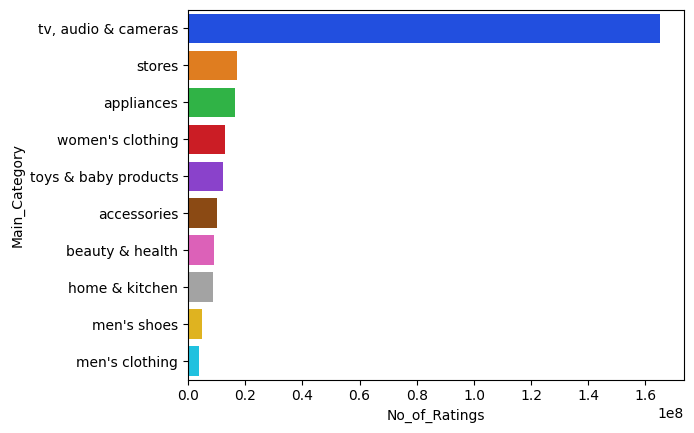

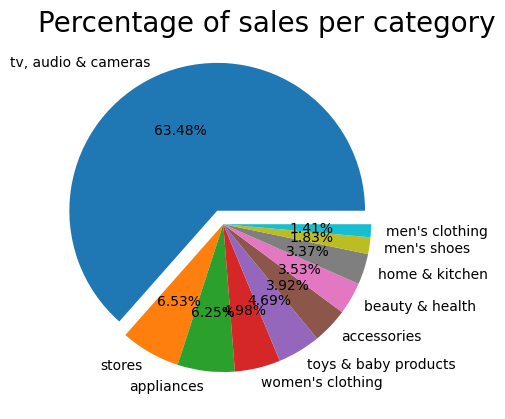

In [36]:
#visualization of most popular products per main category

sns.barplot(data = sales_per_category, y = 'Main_Category', x = 'No_of_Ratings', palette = "bright")
plt.show()

plt.title("Percentage of sales per category", fontsize = 20, color = "black", loc = "left")
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(x=sales_per_category['No_of_Ratings'], labels=sales_per_category['Main_Category'], explode=explode, autopct='%.2f%%')
plt.show()


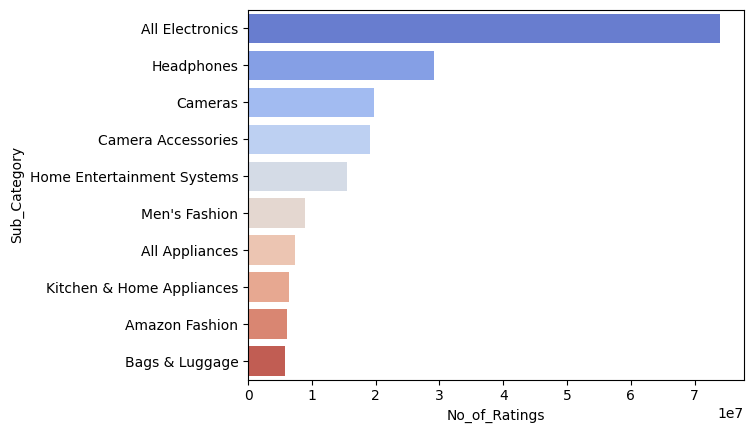

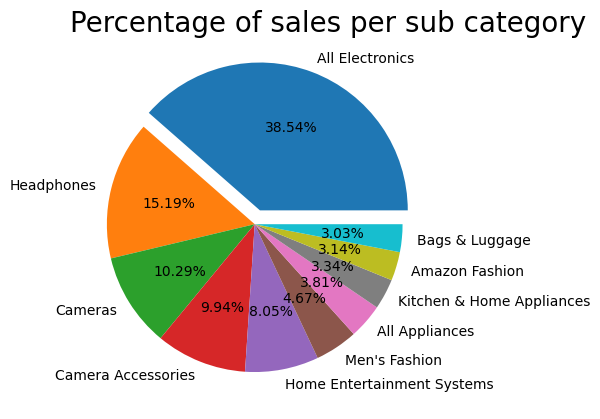

In [37]:
#visualization of most popular products per sub category

sns.barplot(data = sales_per_subcategory, y = 'Sub_Category', x = 'No_of_Ratings', palette = "coolwarm")
plt.show()

plt.title("Percentage of sales per sub category", fontsize = 20, color = "black", loc = "left")
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(x = sales_per_subcategory['No_of_Ratings'], labels = sales_per_subcategory['Sub_Category'], explode = explode, autopct = '%.2f%%')
plt.show()

In [38]:
popular_by_rating

,Name,Main_Category,Sub_Category,Ratings,No_of_Ratings,Discount_Price,Actual_Price,Total_Sales,Percentage_Discount
71417,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"tv, audio & cameras",Cameras,4.3,589547,523.0,700.0,3.083331e+08,25.285714
79485,SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-4...,"tv, audio & cameras",Cameras,4.3,589547,15600.0,22289.0,9.196933e+09,30.010319
70773,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"tv, audio & cameras",Cameras,4.3,589547,495.0,500.0,2.918258e+08,1.000000
61338,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"tv, audio & cameras",Camera Accessories,4.3,589547,523.0,700.0,3.083331e+08,25.285714
70497,SanDisk 128GB Class 10 microSDXC Memory Card w...,"tv, audio & cameras",Cameras,4.3,589547,1705.0,3999.0,1.005178e+09,57.364341
...,...,...,...,...,...,...,...,...,...
11884,TP-link N300 WiFi Wireless Router TL-WR845N | ...,"tv, audio & cameras",All Electronics,4.2,124050,1099.0,1699.0,1.363310e+08,35.314891
13984,"JBL Go 3, Wireless Ultra Portable Bluetooth Sp...","tv, audio & cameras",All Electronics,4.4,122476,3215.0,4499.0,3.937603e+08,28.539675
20879,"JBL Go 3, Wireless Ultra Portable Bluetooth Sp...","tv, audio & cameras",All Electronics,4.4,122476,3215.0,3999.0,3.937603e+08,19.604901
14053,"JBL Go 3, Wireless Ultra Portable Bluetooth Sp...","tv, audio & cameras",All Electronics,4.4,122476,3214.0,3999.0,3.936379e+08,19.629907


In [39]:
popular_by_rating_d = popular_by_rating[['Name', 'Ratings', 'No_of_Ratings', 'Total_Sales']].drop('Name', axis=1)
popular_by_rating_d 

,Ratings,No_of_Ratings,Total_Sales
71417,4.3,589547,3.083331e+08
79485,4.3,589547,9.196933e+09
70773,4.3,589547,2.918258e+08
61338,4.3,589547,3.083331e+08
70497,4.3,589547,1.005178e+09
...,...,...,...
11884,4.2,124050,1.363310e+08
13984,4.4,122476,3.937603e+08
20879,4.4,122476,3.937603e+08
14053,4.4,122476,3.936379e+08


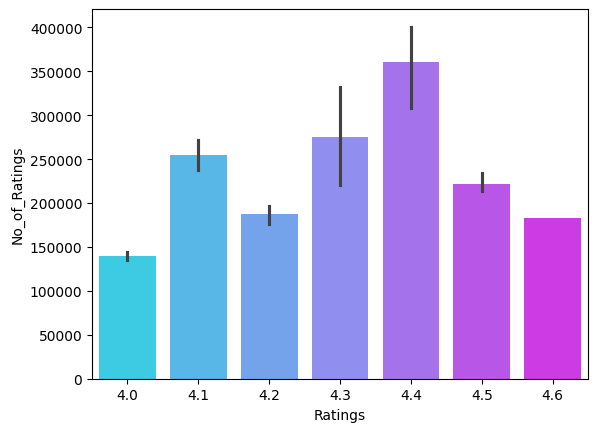

In [40]:
#barplot for popular products which has ratings greater than 4
sns.barplot(data = popular_by_rating_d, x = 'Ratings', y = 'No_of_Ratings', palette = 'cool')
plt.show()

In [41]:
#Checking for the correlation coefficient between the numerical fields in the popular products data (per rating)
popular_by_rating_d.corr(method='pearson')[['Total_Sales']]

,Total_Sales
Ratings,0.083404
No_of_Ratings,0.288961
Total_Sales,1.000000


Findings and Reporting – 

•	The Amazon Product Sales dataset is useful for analytics since it contains a significant number of records. All necessary elements, including Actual Price and Number of Ratings, were filled in. As seen during the Data Cleaning stage of this analytics project.
•	the Amazon Product Sales dataset has a large number of missing values in addition to erroneous entries in several areas. This takes a lot of cleaning time and skill.
•	Some of my findings include the following –

o	The following popular product categories were noted as appearing to have the highest sales and ratings:
1.	TV, audio & cameras
2.	Stores
3.	Appliances
4.	Women's clothing
5.	Toys & baby products

o	The following popular product subcategories were noted to have the highest sales and ratings:
1.	All electronics
2.	Headphones
3.	Cameras
4.	Camera Accessories
5.	Home Entertainment Systems
6.	Men’s Fashion 
7.	All Appliances
8.	Kitchen & Home Appliances
9.	Amazon Fashion
10.	Bags & Luggage

o	The following were some of the most well-liked and best-selling items and the rating of the product are greater than 4:
1.	SanDisk 400GB Class 10 MicroSD Card
2.	Amazon Basics High-Speed HDMI Cable - 10 Feet
3.	boAt BassHeads 100 in-Ear Wired Headphones with Mic
4.	Amazon Basics AAA Performance Alkaline Non-Rechargeable Batteries
5.	Redmi 9 (Sporty Orange, 4GB RAM, 64GB Storage)
o	Among the goods with poor sales performance are:
1.	Moti Chain Gold Plated Beautiful American Diamond Heart Shape Necklace Golden Chain Pendant for Women and Girls
2.	Diwali Gift - Om Jewells Rhodium Plated Aqua Blue Solitaire Crystal Hoop Earrings
3.	Canvas EP8 Wired Durable, Stereo in Ear Earphone for Cell Phones with HD Mic
4.	Bigwig MATTE BLUE EYELINER
5.	TIMELINE Wash Basin and Sink Cleaning Multipurpose Brush

•	Additionally, as the correlation data shows, buyers like items with higher ratings in categories and those with high ratings overall; the best-selling products fall into the 4.2 to 4.4 rating range.
•	One significant tendency in product sales has been observed: consumers frequently purchase top-selling goods from the same brand.
•	Key elements influencing product sales include:
	Most sales appear to be in well-established product categories including clothing, appliances, and electronics.
	It doesn't appear that discounts boost sales. In fact, it was shown that items with significant discounts have lower sales (the correlation coefficient data demonstrates this).
	The item's pricing (original price) has no bearing on the number of sales.

